Hello,

In this project, I will work with the data set https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales 
This data set contains the sales of 3 branches of a supermarket between January 2019 to March 2019.
We will study this data as if we were in April 2019 and would like to use it to solve a problem.
The problem that I will tackle is the one of understanding customers' behavior:
- Busy times
- Most sold categories of products
- Gender of customers
- Which branch sells more

Using insights from the analysis of the customer's behavior we could make data-driven decisions regarding customer targeting, inventory management, and marketing strategies.  

In this case study, suppose that I will have to report to my data science/programming team head and my CEO on this project.
For each role, I will have to present a different point of view that fits their interest and specialization.

In general, my data science/programming team head will need to know about the technicalities of my approach to the problem:
- Structure of the data
- Population size
- Language and libraries used in the analysis
- Processing and cleaning
- The code (in our case python)

For the CEO, I would focus on the problem that we are trying to solve and the findings that this analysis yielded. 
I would summarize the data in charts, plots, and tables with clear labels that will help them make decisions.



Attribute information

**Invoice id:** Computer generated sales slip invoice identification number

**Branch:** Branch of supercenter (3 branches are available identified by A, B and C).

**City:** Location of supercenters

**Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card.

**Gender:** Gender type of customer

**Product line:** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

**Unit price:** Price of each product in dollars

**Quantity:** Number of products purchased by customer

**Tax:** 5% tax fee for customer buying

**Total:** Total price including tax

**Date:** Date of purchase (Record available from January 2019 to March 2019)

**Time:** Purchase time (10am to 9pm)

**Payment:** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

**COGS:** Cost of goods sold

**Gross margin percentage:** Gross margin percentage

**Gross income:** Gross income

**Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# leading the csv file in the variable df
df = pd.read_csv("supermarket_sales.csv")


In [7]:
# let us have now get to know more about the data set


# let us print the first few rows on the data
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
# Now let us check the columns and their data types. This will help us make sure that the data types are coherent.
# We might need to apply function to correct the types (For example, numbers stored as strings)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

We can see tha there are 17 columns in our data set. All data types that are not numbers or boolean are of type "object". We need to make sure that the date and the time are not strings. To acheave this we will convert them to the proper types.

In [13]:
# we create a new column called 'invoiceDate' that store the dates of each invoice
df['invoiceDate'] = pd.to_datetime(df['Date'])

# we create a new column caled 'invoiceTime' that store the times of each purchase
df['invoiceDate'] = pd.to_datetime(df['Time']).dt.time

Now that we have corrected the data types, let us look for null values (missing fields)

In [14]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
invoiceDate                0
dtype: int64

There are no null values in our data set. If there were such values, we could use the following function to delete them:

In [15]:
df = df.dropna()

We can now have a look at our data size and few summary values of numerical columns (means, standard deviations...).
If some of the values are way above what is normal we will need to delete the values that are responsible for the deviation or correct them if we know the actual value.

In [16]:
# number of rows 
df.shape

(1000, 18)

We have 1000 purchases in all 3 branches in 3 months.

In [17]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Just from this output, we can already see that on average customers buy 5 items per purchase and that overall the customer show satisfaction with their shopping experience. We can also see that customers did not buy items that are $100 or above.
There are many things we can say just from this output but we will save them for later.

In the 'Product line' column we have the category of the purchased items. We can use the function 'unique()' to understand the categories of the products.

In [18]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

'Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories' are all the categories that help us classify products in the supermarket.

We can now see what are the top 3 most purchased categories.

In [20]:
df['Product line'].value_counts().head(3)

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Name: Product line, dtype: int64

All of the steps above were meant to make us more familiar with the data set and give us ideas to explore in order to solve the problem.
Now we will start studying the customer's behavior in general and in each branch.

**Identifying busy hours in general and for each branch**

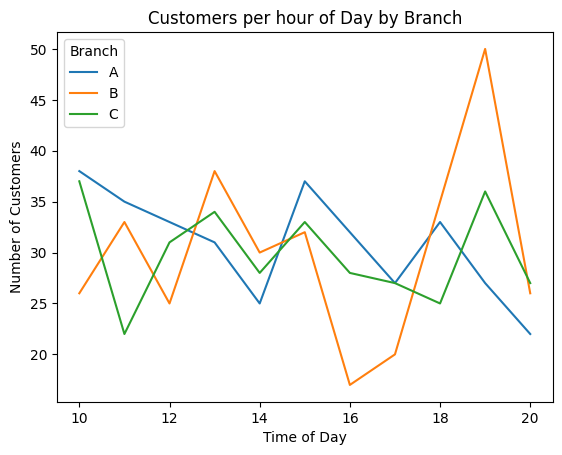

In [88]:
df["datetime"] = pd.to_datetime(df["Date"]+" "+df["Time"])
df["hour"] = df["datetime"].dt.hour
# group the data by branch and hour of day
grouped = df.groupby(["Branch", "hour"])["Invoice ID"].count()

# reset the index so we can pivot the data
grouped = grouped.reset_index()

# pivot the data so that each branch is a column and the values are the number of customers
pivoted = grouped.pivot(index="hour", columns="Branch", values="Invoice ID")

# plot the data using a line chart
pivoted.plot(kind="line")

# add a title and labels to the axes
plt.title("Customers per hour of Day by Branch")
plt.xlabel("Time of Day")
plt.ylabel("Number of Customers")

# show the plot
plt.show()



We can see that branch B has a peak after 18 every day before closing time.

**Most sold categories of products**

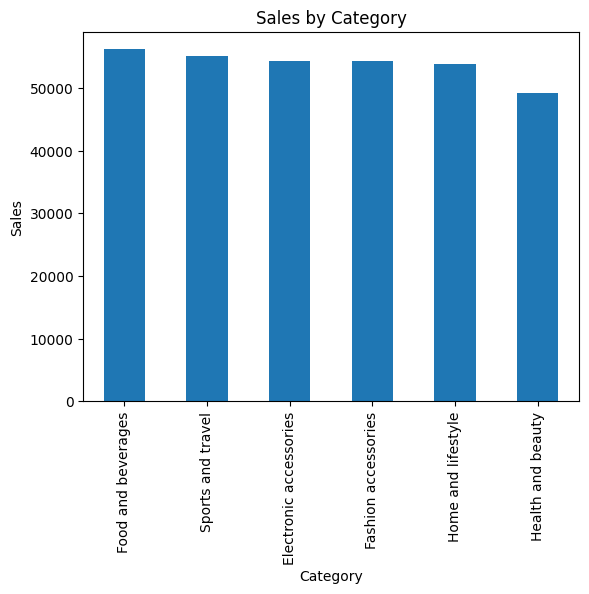

In [82]:
sales_by_category = df.groupby('Product line')['Total'].sum()

# sort data by sales
sales_by_category = sales_by_category.sort_values(ascending=False)

# Create bar chart of sales by category
sales_by_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales by Category')
plt.show()

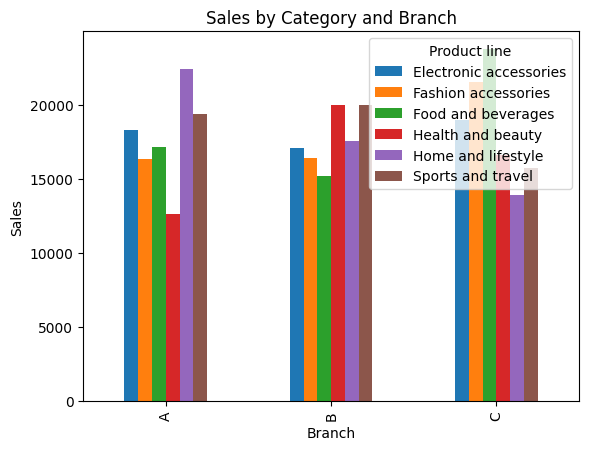

In [83]:
# group data by category, branch and sum sales
sales_by_cat_branch = df.groupby(['Product line','Branch'])['Total'].sum()

# unstack category to branch
sales_by_cat_branch = sales_by_cat_branch.unstack(level=0)

# Create bar chart of sales by category for each branch
sales_by_cat_branch.plot(kind='bar')
plt.xlabel('Branch')
plt.ylabel('Sales')
plt.title('Sales by Category and Branch')
plt.show()

Overall, all categories are the almost the same when it comes to sales.

**Gender of customers**

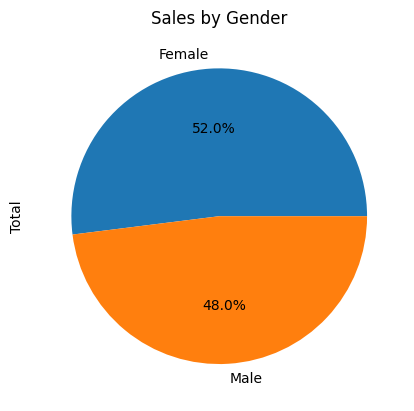

In [52]:
#group data by gender and sum sales
sales_by_gender = df.groupby('Gender')['Total'].sum()

#Create pie chart of sales by gender
sales_by_gender.plot(kind='pie',autopct='%1.1f%%')
plt.title('Sales by Gender')
plt.show()

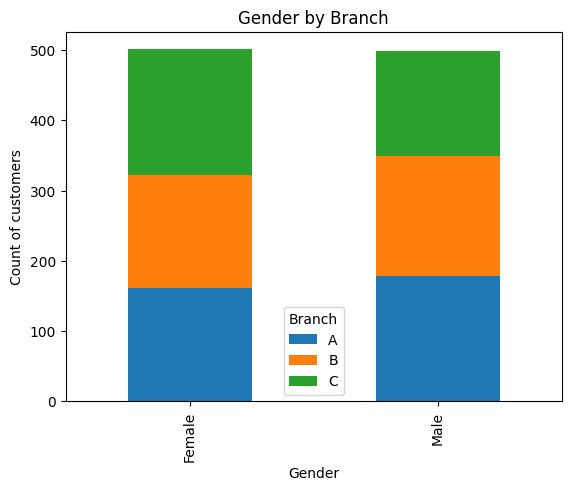

In [54]:
# group data by gender, branch and calculate the count of customers
gender_by_branch = df.groupby(['Gender','Branch']).size().reset_index(name='counts')

#pivot table to have branch as columns and gender as rows
gender_by_branch_pivot = gender_by_branch.pivot(index='Gender', columns='Branch', values='counts')

# Create a stacked bar chart of gender by branch
gender_by_branch_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count of customers')
plt.title('Gender by Branch')
plt.legend(title='Branch')
plt.show()

There gender distribution and uniform among all branches and there are alsmost as many male customers as female custoemrs.

**Which branch sells more**

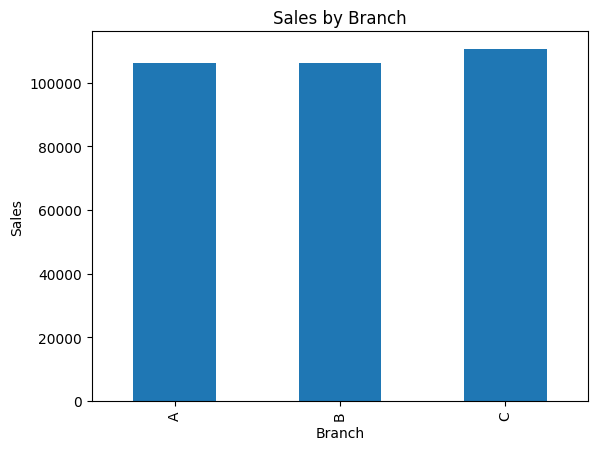

In [58]:
sales_by_branch = df.groupby('Branch')['Total'].sum()

# Create bar chart of sales by branch
sales_by_branch.plot(kind='bar')
plt.xlabel('Branch')
plt.ylabel('Sales')
plt.title('Sales by Branch')
plt.show()

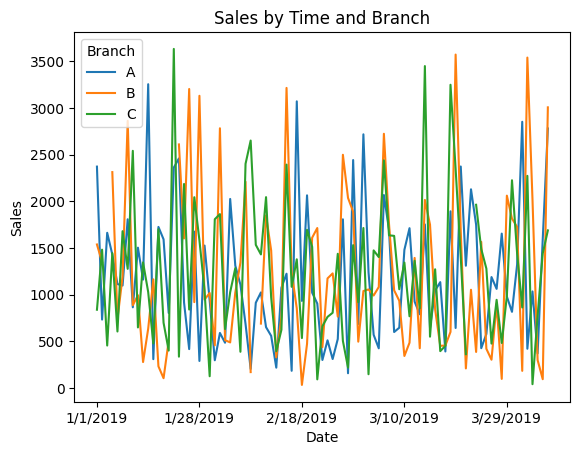

In [57]:
# group data by time and branch and sum sales
sales_by_time_branch = df.groupby(['Date','Branch'])['Total'].sum().reset_index()

# pivot table to have time as index and branch as columns
sales_by_time_branch_pivot = sales_by_time_branch.pivot(index='Date', columns='Branch', values='Total')

# Create a line chart of sales over time for each branch
sales_by_time_branch_pivot.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Time and Branch')
plt.legend(title='Branch')
plt.show()

All branches have similar sales.

From the above charts and findings, we do not see any significant difference between braches in termes of customer's spendings, preferences and gender. 
For any marketing strategy, I would recommed that it does not differenciate between genders, products types pr branche. Any strategy approved by the marketing departement should be implemented uniformly accross all branches.
Branch A can hire a part time worker for the night shift to help the other workers deal with the high number of customers before closing.